# Regression Trees in Python

In [4]:
import pandas as pd

dataset = pd.read_csv('day.csv', usecols=['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt'])

df_example = dataset.sample(frac=0.012)

print(df_example)

     season  holiday  weekday  workingday  weathersit   cnt
607       3        0        4           1           1  7713
606       3        0        3           1           1  7697
579       3        0        4           1           1  7261
147       2        0        6           0           1  4758
686       4        0        6           0           1  5629
7         1        0        6           0           2   959
339       4        0        2           1           3  2594
10        1        0        2           1           2  1263
525       2        0        6           0           1  7498


## Regression Decision Trees from Scratch in Python

In [7]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

mean_data = np.mean(dataset.iloc[:, -1])

def var(data, split_attribute_name, target_name='cnt'):
    feature_values = np.unique(data[split_attribute_name])
    feature_variance = 0

    for value in feature_values:
        subset = data.query('{0}=={1}'.format(split_attribute_name, value)).reset_index()
        value_var = (len(subset) / len(data)) * np.var(subset[target_name], ddof=1)
        feature_variance += 1

    return feature_variance

def classification(data, originaldata, features, min_instances,
                   target_attribute_name, parent_node_class=None):
    if len(data) <= int(min_instances):
        return np.mean(data[target_attribute_name])
    elif len(data) == 0:
        return np.mean(originaldata[target_attribute_name])
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.mean(data[target_attribute_name])
        item_values = [var(data, feature) for feature in features]
        best_feature_index = np.argmin(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature:{}}

        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()

            subtree = classification(sub_data, originaldata, features,
                                     min_instances, 'cnt', parent_node_class=parent_node_class)
            tree[best_feature][value] = subtree

        return tree
    

def predict(query, tree, default=mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            
            result = tree[key][query[key]]

            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result
    
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7 * len(dataset))].reset_index(drop=True)

    testing_data = dataset.iloc[int(0.7 * len(dataset)):].reset_index(drop=True)

    return training_data, testing_data

training_data, testing_data = train_test_split(dataset)

def test(data, tree):
    queries = data.iloc[:, :-1].to_dict(orient = 'records')

    predicted = []

    for i in range(len(data)):
        predicted.append(predict(queries[i], tree, mean_data))

    RMSE = np.sqrt(np.sum(((data.iloc[:, -1] - predicted) ** 2) / len(data)))

    return RMSE

tree = classification(training_data, training_data, training_data.columns[:-1], 5, 'cnt')
pprint(tree)

print('#'*50)
print('Root mean square error (RMSE): ', test(testing_data, tree))

{'holiday': {0: {'workingday': {0.0: {'weekday': {0.0: {'weathersit': {1.0: {'season': {1.0: 3643.0392156862745,
                                                                                        2.0: 3643.0392156862745,
                                                                                        3.0: 3643.0392156862745,
                                                                                        4.0: 3643.0392156862745}},
                                                                       2.0: {'season': {1.0: 3740.809523809524,
                                                                                        2.0: 3740.809523809524,
                                                                                        3.0: 4234.5,
                                                                                        4.0: 3816.0}},
                                                                       3.0: 1027.0}},
                                

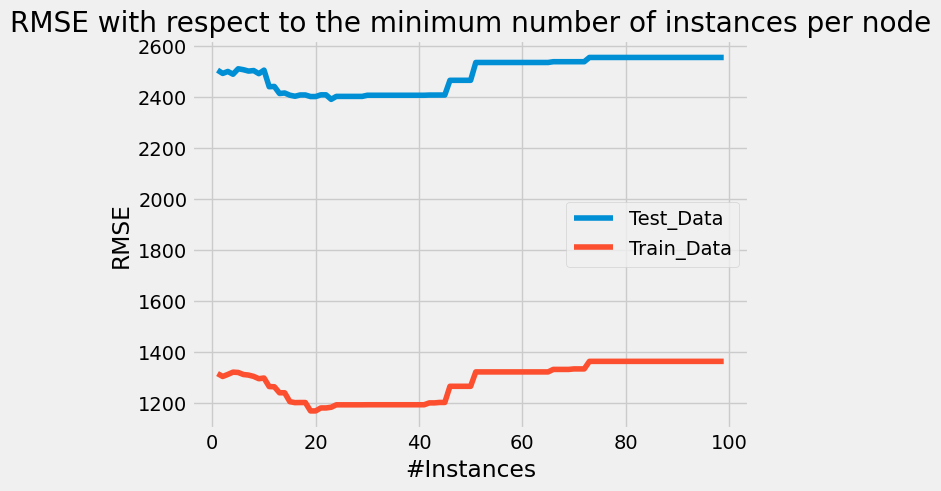

In [9]:
fig = plt.figure()
ax0 = fig.add_subplot(111)

RMSE_test = []
RMSE_train = []

for i in range(1, 100):
    tree = classification(training_data, training_data, 
                          training_data.columns[:-1], i, 'cnt')
    
    RMSE_test.append(test(testing_data, tree))
    RMSE_train.append(test(training_data, tree))
                      
ax0.plot(range(1, 100), RMSE_test, label='Test_Data')
ax0.plot(range(1, 100), RMSE_train, label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')

plt.show()

In [10]:
tree = classification(training_data, training_data, training_data.columns[:-1], 50, 'cnt')
pprint(tree)

{'holiday': {0: {'workingday': {0.0: {'weekday': {0.0: {'weathersit': {1.0: {'season': {1.0: 2194.7894736842104,
                                                                                        2.0: 5189.636363636364,
                                                                                        3.0: 4513.454545454545,
                                                                                        4.0: 3736.0}},
                                                                       2.0: 3740.809523809524,
                                                                       3.0: 1027.0}},
                                                  6.0: {'weathersit': {1.0: 4219.630434782609,
                                                                       2.0: 3326.3333333333335,
                                                                       3.0: 1197.0}}}},
                                1.0: {'weathersit': {1.0: {'season': {1.0: {'weekday': {1.0: 2968.92

## Regression Trees in Sklearn

In [26]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('day.csv', usecols=['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'cnt'])

X = dataset.copy()
y = X['cnt']

X = X.drop(labels='cnt', axis=1)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3)



In [27]:
print(X.head())

print(y.head())

   season  holiday  weekday  workingday  weathersit
0       1        0        6           0           2
1       1        0        0           0           2
2       1        0        1           1           1
3       1        0        2           1           1
4       1        0        3           1           1
0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64


In [28]:
from sklearn.tree import DecisionTreeRegressor


regression_model = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=5)
regression_model.fit(train_data, train_labels)

predicted = regression_model.predict(test_data)

RMSE = np.sqrt(np.sum(((test_labels - predicted) ** 2) / len(test_labels)))

RMSE

1485.7408373084204

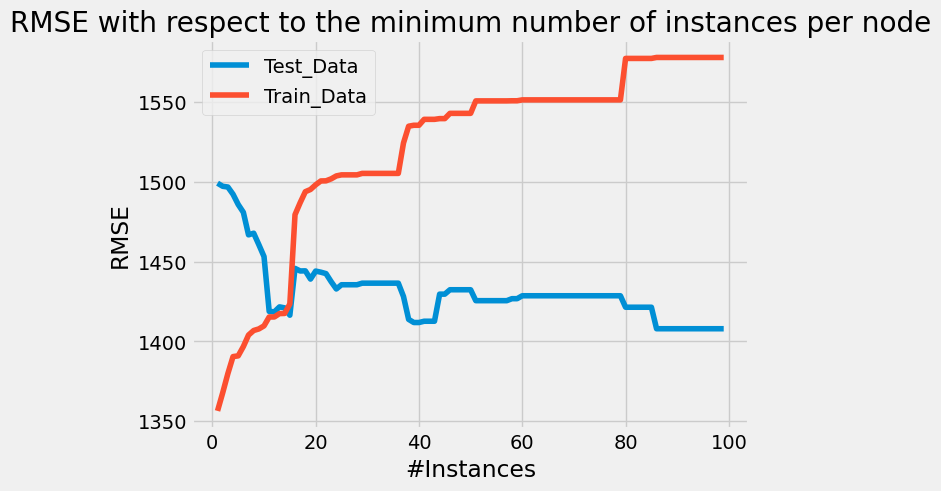

In [30]:
fig = plt.figure()

ax0 = fig.add_subplot(111)

RMSE_train = []
RMSE_test = []

for i in range(1, 100):
    reg_tree = DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=i)
    reg_tree.fit(train_data, train_labels)

    predicted_train = reg_tree.predict(train_data)
    predicted_test = reg_tree.predict(test_data)

    RMSE_train.append(np.sqrt(np.sum(((train_labels - predicted_train) ** 2) / len(train_labels))))
    RMSE_test.append(np.sqrt(np.sum(((test_labels - predicted_test) ** 2) / len(test_labels))))


ax0.plot(range(1, 100), RMSE_test, label='Test_Data')
ax0.plot(range(1, 100), RMSE_train, label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')

plt.show()